In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


df=pd.read_csv("C:\\Users\\shubh\\OneDrive\\Desktop\\intern\\week 3\\day 3\\car_price_prediction.csv")
df.shape

(19237, 18)

In [2]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy']

0        1399.0
1        1018.0
2           NaN
3         862.0
4         446.0
          ...  
19232       NaN
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

In [3]:
df.rename(columns={'Mileage': 'driven_dist'}, inplace=True)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,driven_dist,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df['Engine volume'] = df['Engine volume'].astype(str)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False)
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [5]:
for col in df.select_dtypes(include=np.number).columns:
   df[col] = df[col].fillna(df[col].median())

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(-19785.0), np.float64(47191.0))

In [6]:
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]

print("Shape After Outlier Removal:", df.shape)
print("Total Cars:", df.shape[0])
print("Average Price:", round(df['Price'].mean(), 2))
print("Median Price:", round(df['Price'].median(), 2))
print("Most Common Manufacturer:\n", df['Manufacturer'].value_counts().head(5))
print("Fuel Type Distribution:\n", df['Fuel type'].value_counts())

Shape After Outlier Removal: (18164, 18)
Total Cars: 18164
Average Price: 14024.92
Median Price: 12231.0
Most Common Manufacturer:
 Manufacturer
TOYOTA           3558
HYUNDAI          3460
MERCEDES-BENZ    1905
FORD             1056
CHEVROLET        1043
Name: count, dtype: int64
Fuel Type Distribution:
 Fuel type
Petrol            9499
Diesel            3667
Hybrid            3534
LPG                885
CNG                494
Plug-in Hybrid      84
Hydrogen             1
Name: count, dtype: int64


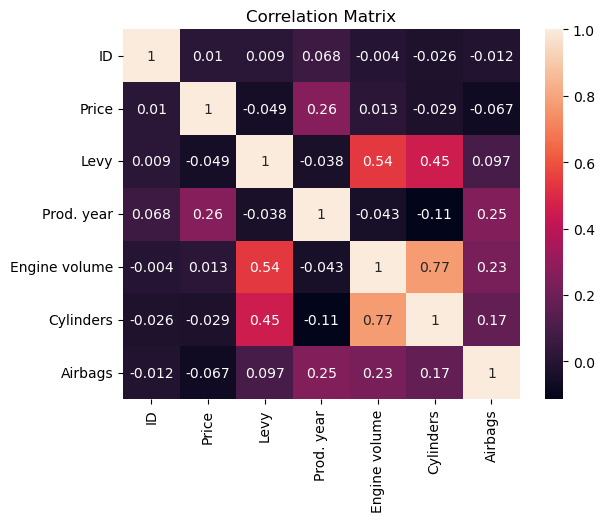

In [7]:
plt.figure()
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [8]:
X = df.drop('Price', axis=1)
y = df['Price']

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

In [11]:
print("Linear Regression R²:", round(r2_lr, 4))
print("Random Forest R²:", round(r2_rf, 4))

Linear Regression R²: 0.4599
Random Forest R²: 0.768


In [12]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))


Top 10 Most Important Features:
                      Feature  Importance
2                  Prod. year    0.211818
5                     Airbags    0.080049
1574         Fuel type_Diesel    0.073610
0                          ID    0.073488
3               Engine volume    0.066726
8798  Gear box type_Tiptronic    0.059985
1                        Levy    0.049174
4                   Cylinders    0.023348
1573     Leather interior_Yes    0.021915
1571           Category_Sedan    0.019233


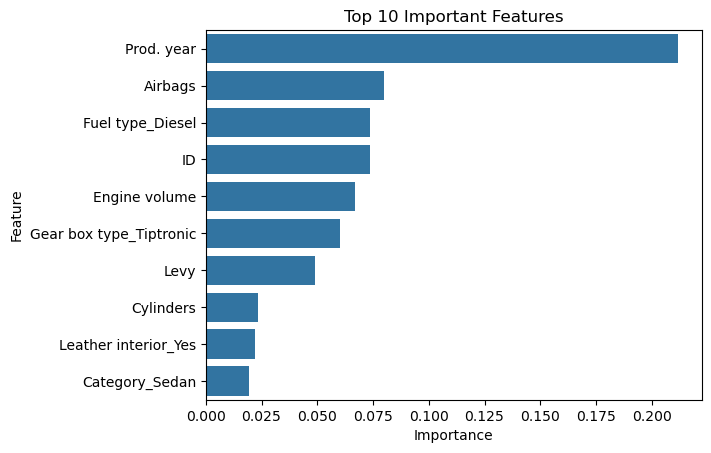

In [13]:
plt.figure()
sns.barplot(x='Importance', y='Feature',
            data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

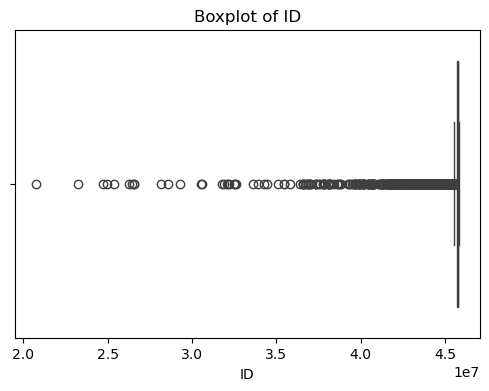

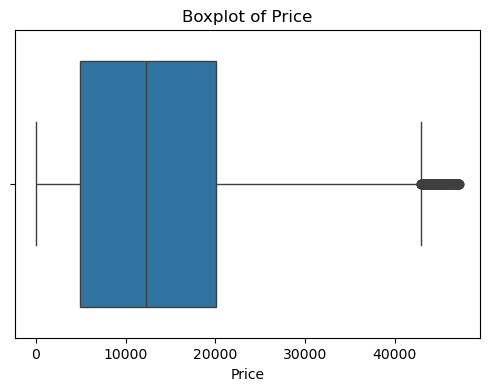

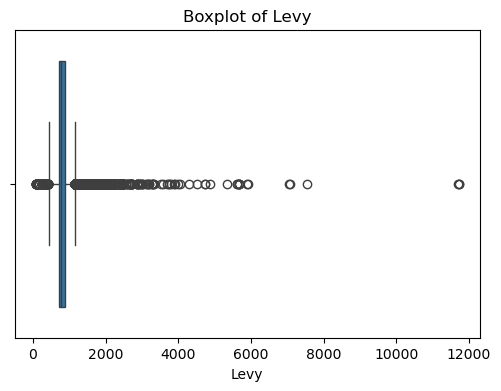

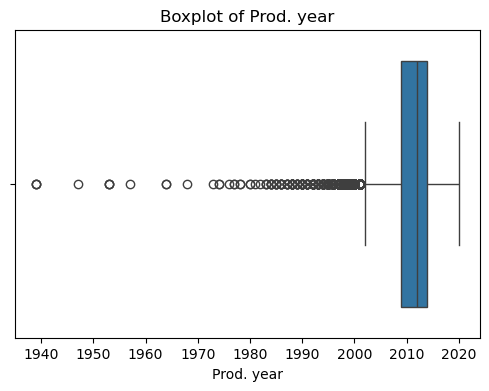

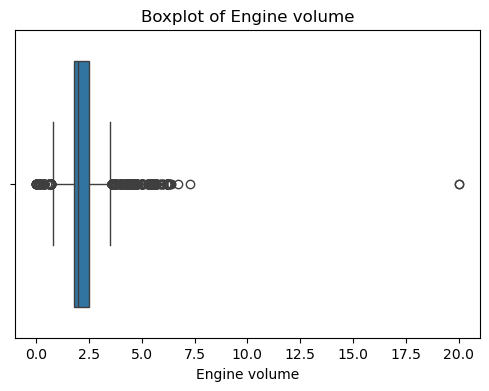

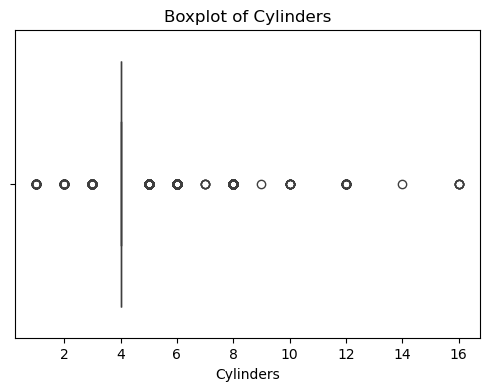

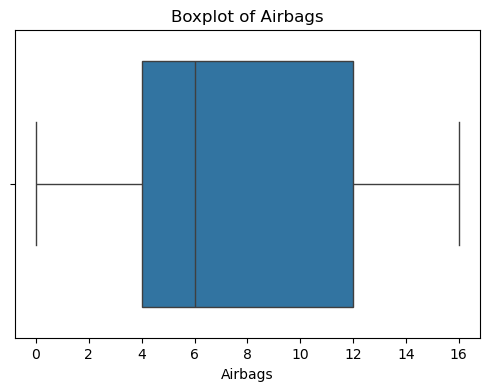

In [14]:
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)  
    plt.title(f"Boxplot of {col}")
    plt.show()